# Decision Tree Classification

In [1]:
#data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

In /home/metriczaruhi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/metriczaruhi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/metriczaruhi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
/home/metriczaruhi/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.Data Exploration

The initial data consists of 4119 observations of 21 variables. There are no duplicates, missing values and variables with single value for all observations. As the main model to be used is a non-parametric and non -linear one(Decision Tree), we are not going to dive deep into the correlations and data manipulation as we used to do. The only transformation to be done will be data scaling, which will be done using a sklearn method(not manually). Deposit subscription is not evenly balanced between 0s and 1s. As the countplot and value counts show, only about 11% of employees are subscribing and ~89% are not.So we can use this info as a naive assumption for newcomers to decide whether they'll leave or stay. In other words, if the resulting score is more than the noted value, then our model will be not bad, otherwise-a bad one.

In [2]:
data=pd.read_csv("MARKETING_FINANCE_Bank_targeting_default.csv")
data.shape

(4119, 21)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue_collar,married,basic_9y,no,yes,no,cellular,may,fri,...,2,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high_school,no,no,no,telephone,may,fri,...,4,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high_school,no,yes,no,telephone,jun,wed,...,1,0,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic_9y,no,unknown,unknown,telephone,jun,fri,...,3,0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin_,married,university_degree,no,yes,no,cellular,nov,mon,...,1,0,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [5]:
data.describe()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,0.227725,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,254.703736,2.568159,1.369053,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,317.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,21.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
#checking number of duplicates, missing values and single valued columns
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


In [7]:
data.y.value_counts(normalize=True)

0    0.890507
1    0.109493
Name: y, dtype: float64

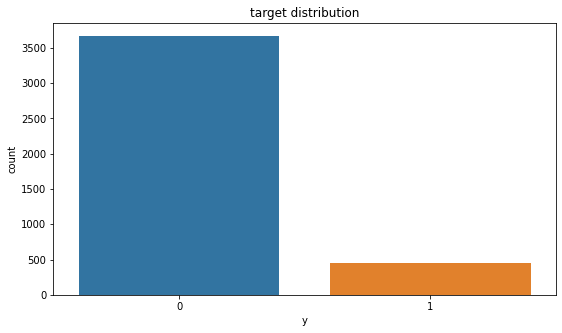

In [8]:
#let's visualise the distribution of y
plt.figure(figsize=(9,5))
sns.countplot(data.y)
plt.title("target distribution")
plt.show()

## 2.Fully grown Decision Tree (w/o GridSearchCV)

We decided first to run model on not scaled data and without removing any variable to see its performance. On the fully grown DT we got 1 and 0.73 ROC AUC scores on train and test sets, respectively. This means that our model is overfitting. Therefore, the next step would be hyperparameter tuning (simplifying the tree by pruning peripheral branches to avoid overfitting).

In [9]:
#separating X and Y
Y=data["y"]
X=data.drop("y",axis=1)

In [10]:
#making dummes,train test split
X=pd.get_dummies(X, drop_first=True)

In [11]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [12]:
#building the model
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X0,Y0)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [13]:
#calculating probabilities
Y0_dt=dt.predict_proba(X0)[:,1]
Y1_dt=dt.predict_proba(X1)[:,1]

In [14]:
#calculating roc auc score
print("ROC_AUC Train for Fully grown DT:",roc_auc_score(Y0,Y0_dt))
print("ROC_AUC Test for Fully grown DT:",roc_auc_score(Y1,Y1_dt))

ROC_AUC Train for Fully grown DT: 1.0
ROC_AUC Test for Fully grown DT: 0.7299803763360527


## 2.1 Manually trying different parameters for Decision Tree Classification ¶


Manual tuning or just setting up max_depth and min_samples_leaf in the estimator to some values gives a much better result than in case of fully grown tree. As a result, we get drastically better results and no overfitting: 0.926 on train and 0.907 on test sets.

In [15]:
#setting 2 hyperparameter values manually
dt1=DecisionTreeClassifier(random_state=42, max_depth=10,min_samples_leaf=200).fit(X0,Y0)

In [16]:
#calculating probabilities
Y0_dt1=dt1.predict_proba(X0)[:,1]
Y1_dt1=dt1.predict_proba(X1)[:,1]

In [17]:
#much higher ROC AUC score and almost no overfitting
print("ROC_AUC Train for Manually Tuned DT:",roc_auc_score(Y0,Y0_dt1))
print("ROC_AUC Test for Manually Tuned DT:",roc_auc_score(Y1,Y1_dt1))

ROC_AUC Train for Manually Tuned DT: 0.9264881199479709
ROC_AUC Test for Manually Tuned DT: 0.90755959318252


## 3.Tuned Decision Tree using GridSearch

In order to fight overfitting, we will use GridSearch to tune the hyperparameters of the model. In particular, the ones we will control are the following:

- max_depth: None or integer. The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split:integer or float. The minimum number of samples required to split an internal node.If integer, then it is considered as the minimum number. If float, then this is a fraction and (min_samples_split * n_samples) are the minimum number of samples for each split.
- class_weight: "balanced" or None. The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

We tuned hyperparameters on training set and used the best parameters to build another DT model. This tuned model produced 0.94 and 0.91 ROC AUC scores on training and testing sets, respectively, dramatically decreasing the overfitting from the previous result.

In [18]:
#setting up the ranges for hyperparameters
param_dt={"max_depth":range(1,15),"min_samples_leaf":range(10,150,10),
          "class_weight":["balanced", None]}

In [19]:
#Cross-Validated Gridsearch
gs_dt=GridSearchCV(estimator=dt,param_grid=param_dt,scoring="roc_auc",cv=5,n_jobs=-1)
gs_dt.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                     

In [20]:
#let's see the optimal parameters
best_params = gs_dt.best_params_
best_params

{'class_weight': None, 'max_depth': 6, 'min_samples_leaf': 40}

In [21]:
#fitting the model with best parameters
dt_grid=DecisionTreeClassifier(class_weight=best_params['class_weight'],max_depth=best_params['max_depth'],
                             min_samples_leaf=best_params['min_samples_leaf'], random_state=42).fit(X0,Y0)

#getting probabilities
Y0_dt_grid=dt_grid.predict_proba(X0)[:,1]
Y1_dt_grid=dt_grid.predict_proba(X1)[:,1]

In [22]:
#calculating roc auc score 
print("ROC_AUC Train for Tuned DT:",roc_auc_score(Y0,Y0_dt_grid))
print("ROC_AUC Test for Tuned DT:",roc_auc_score(Y1,Y1_dt_grid))

ROC_AUC Train for Tuned DT: 0.9452826794568024
ROC_AUC Test for Tuned DT: 0.9126697148093916


In [23]:
#Mean cross val score for model with default hyperparameters
print("Mean 5-fold ROC AUC score for DT Tuned hyperparameters:",np.mean(cross_val_score(estimator=dt_grid, X=X,y=Y,cv=5, scoring="roc_auc")))

Mean 5-fold ROC AUC score for DT Tuned hyperparameters: 0.92602866158652


## 4.Decision Tree and Logistic Regression results comparison based on non-scaled data


We will fit Logistic regression based on the best parameters obtained from the Grid Search. As the roc_auc scores show, logistic regression results based on single split are better than DT's. Here, tuned logit gets 0.937 and 0.927 ROC AUC scores on training and testing sets, respectively, outperforming DT  on testing set and also with less overfitting. Logit also performs a little better in terms of 5-fold CV score: for tuned DT it was 0.926, Logit's is 0.93.

In [24]:
#Hyperparameter tuning for Logistic Regression
logit=LogisticRegression(random_state=42)
param_logit={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,50,20)}
gs_logit=GridSearchCV(estimator=logit,param_grid=param_logit,
                        scoring="roc_auc",
                        cv=5,verbose=1).fit(X,Y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   49.5s finished


In [25]:
best_params_logit = gs_logit.best_params_
best_params_logit

{'C': 2.631673684210526, 'class_weight': 'balanced'}

In [26]:
#fitting logit with best params of gridsearch
logit_grid=LogisticRegression(C=best_params_logit['C'], class_weight=best_params_logit['class_weight'],random_state=42).fit(X0,Y0)
#making predictions
Y0_logit=logit_grid.predict_proba(X0)[:,1]
Y1_logit=logit_grid.predict_proba(X1)[:,1]

In [27]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_logit))

ROC_AUC Train: 0.9379780600633972
ROC_AUC Test: 0.927551823406947


In [28]:
print("Mean 5-fold ROC AUC score for LOGIT Tuned hyperparameters:",np.mean(cross_val_score(estimator=logit_grid, X=X,y=Y,cv=5, scoring="roc_auc")))


Mean 5-fold ROC AUC score for LOGIT Tuned hyperparameters: 0.9298758489066692


## 5.Decision Tree and Logistic Regression results comparison based on scaled data


In [29]:
#Standardization, we will standartize only Xs, as our Y is binary:0-if not subscribed, 1-if subscribed
#fit_transform fits to the data and transforms it by subtracting the mean and dividing to standard deviation
sc=StandardScaler()
sc = sc.fit(X0)
X0_sc=pd.DataFrame(sc.transform(X0), columns=X0.columns.tolist())
X1_sc=pd.DataFrame(sc.transform(X1), columns=X1.columns.tolist())
X_sc=pd.DataFrame(sc.transform(X), columns=X.columns.tolist())

In [30]:
#GridSearching Logit on scaled data
logit_sc=LogisticRegression(random_state=42)
param_logit_sc={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,50,20)}
gs_logit_scaled=GridSearchCV(estimator=logit_sc,param_grid=param_logit_sc,
                        scoring="roc_auc",
                        cv=5,verbose=1).fit(X_sc,Y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   41.7s finished


In [31]:
best_params_logit_scaled = gs_logit_scaled.best_params_
best_params_logit_scaled

{'C': 2.631673684210526, 'class_weight': 'balanced'}

In [32]:
#building logit on scaled data using best params
logit_scaled=LogisticRegression(C=best_params_logit_scaled['C'], class_weight=best_params_logit_scaled['class_weight'],random_state=42).fit(X0_sc,Y0)
#calculating roc auc score and mean CV score: note that I haven't separately saved predicted probabilities
print("ROC_AUC Train for Scaled logit:",roc_auc_score(Y0,gs_logit_scaled.predict_proba(X0_sc)[:,1]))
print("ROC_AUC Test for Scaled logit:",roc_auc_score(Y1,gs_logit_scaled.predict_proba(X1_sc)[:,1]))
print("Mean 5-fold ROC AUC score for Scaled LOGIT:",np.mean(cross_val_score(estimator=logit_scaled, X=X_sc,y=Y,cv=5, scoring="roc_auc")))


ROC_AUC Train for Scaled logit: 0.9463731832919273
ROC_AUC Test for Scaled logit: 0.9398738905656995
Mean 5-fold ROC AUC score for Scaled LOGIT: 0.9319596170677353


In [33]:
#DT on scaled data
#setting up the ranges
dt_sc=DecisionTreeClassifier(random_state=42)
param_dt_sc={"max_depth":range(1,15),"min_samples_leaf":range(10,150,10),
          "class_weight":["balanced", None]}
gs_dt_scaled=GridSearchCV(estimator=dt_sc,param_grid=param_dt_sc,
                        scoring="roc_auc",
                        cv=5,verbose=1).fit(X_sc,Y)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1960 out of 1960 | elapsed:   28.1s finished


In [34]:
best_params_dt_scaled = gs_dt_scaled.best_params_
best_params_dt_scaled

{'class_weight': None, 'max_depth': 6, 'min_samples_leaf': 40}

In [35]:
dt_scaled=DecisionTreeClassifier(max_depth=best_params_dt_scaled['max_depth'], 
                                 min_samples_leaf=best_params_dt_scaled['min_samples_leaf'],
                                 class_weight=best_params_dt_scaled['class_weight'], random_state=42).fit(X0_sc,Y0)
print("ROC_AUC Train:",roc_auc_score(Y0,dt_scaled.predict_proba(X0_sc)[:,1]))
print("ROC_AUC Test:",roc_auc_score(Y1,dt_scaled.predict_proba(X1_sc)[:,1]))
print("Mean 5-fold ROC AUC score Scaled DT:",np.mean(cross_val_score(estimator=dt_scaled, X = X_sc,y=Y,cv=5, scoring="roc_auc")))

ROC_AUC Train: 0.9452826794568024
ROC_AUC Test: 0.9126697148093916
Mean 5-fold ROC AUC score Scaled DT: 0.92602866158652


# Results

In [36]:
#5-fold mean cross-validated score based on the whole data for all models
print("Mean 5-fold ROC AUC score for DT Tuned Not Scaled:",np.mean(cross_val_score(estimator=dt_grid, X=X,y=Y,cv=5, scoring="roc_auc")))
print("Mean 5-fold ROC AUC score for DT Tuned Scaled:",np.mean(cross_val_score(estimator=dt_scaled, X=X_sc,y=Y,cv=5, scoring="roc_auc")))
print("Mean 5-fold ROC AUC score for Logit Tuned Not Scaled:",np.mean(cross_val_score(estimator=logit_grid, X=X,y=Y,cv=5, scoring="roc_auc")))
print("Mean 5-fold ROC AUC score for Logit Tuned Scaled:",np.mean(cross_val_score(estimator=logit_scaled, X=X_sc,y=Y,cv=5, scoring="roc_auc")))

Mean 5-fold ROC AUC score for DT Tuned Not Scaled: 0.92602866158652
Mean 5-fold ROC AUC score for DT Tuned Scaled: 0.92602866158652
Mean 5-fold ROC AUC score for Logit Tuned Not Scaled: 0.9298758489066692
Mean 5-fold ROC AUC score for Logit Tuned Scaled: 0.9319596170677353


## 5.Gain and Lift charts for DT model

In [37]:
#Summarizing the results based on CV score: CV for not scaled , tuned DT and Logit and scaled ones.
#To plot ROC curve, we should get TPR(sensitivity), FPR(1-Specificity) for different thresholds
FPR,TPR,thresholds=roc_curve(Y1,Y1_dt_grid)

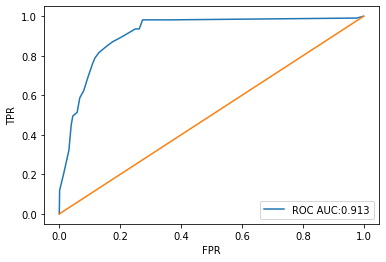

In [38]:
#ROC Curves for DT best model
#plotting ROC Curve
plt.plot(FPR,TPR,label=f"ROC AUC:{roc_auc_score(Y1,dt_grid.predict_proba(X1)[:,1]).round(3)}")
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

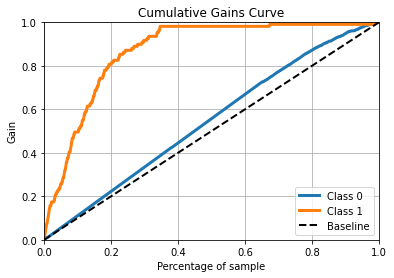

In [39]:
#Cummulative gain curve
skplt.metrics.plot_cumulative_gain(Y1,dt_grid.predict_proba(X1))
plt.show()

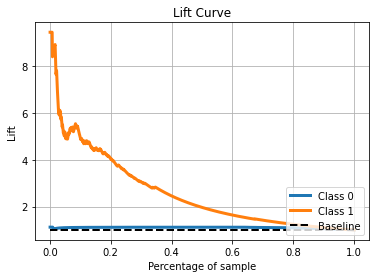

In [40]:
#lift curve
skplt.metrics.plot_lift_curve(Y1,dt_grid.predict_proba(X1))
plt.show()

# Feature importances for Decision Tree model


In [41]:
#property returning feature importances as array
dt_grid.feature_importances_

array([0.        , 0.52593825, 0.01111797, 0.01864045, 0.        ,
       0.01375546, 0.0256455 , 0.00728862, 0.00299968, 0.3540121 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00616456,
       0.        , 0.        , 0.00134864, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03308875])

In [42]:
#making a dataframe for convenient usage
feat_imp=pd.DataFrame(dt_grid.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head(10)

,Feature_imp
duration,0.525938
nr_employed,0.354012
poutcome_success,0.033089
cons_price_idx,0.025645
pdays,0.018640
emp_var_rate,0.013755
campaign,0.011118
cons_conf_idx,0.007289
housing_yes,0.006165
euribor3m,0.003000


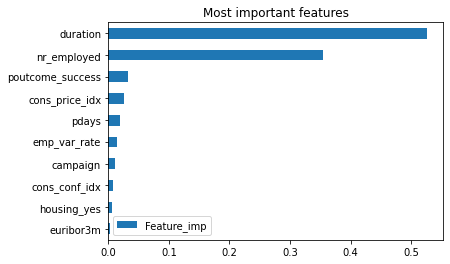

In [43]:
#visualizing feature importances
feat_imp.head(10).sort_values('Feature_imp').plot.barh()
plt.title("Most important features")
plt.show()

As you see, the most important feature, according to tuned DT model, is duration, which contributes to 52% gini reduction.

In [44]:
#removing columns with 0 importance meaning that the tree was not splitted with those features
to_remove = feat_imp[feat_imp.Feature_imp==0].index
print(to_remove)

Index(['housing_unknown', 'month_jun', 'loan_unknown', 'loan_yes', 'month_aug',
       'month_dec', 'month_jul', 'month_oct', 'month_mar', 'month_may',
       'month_nov', 'default_unknown', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'default_yes', 'age', 'education_unknown',
       'education_university_degree', 'previous', 'job_blue_collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self_employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic_6y', 'education_basic_9y',
       'education_illiterate', 'education_professional_course',
       'education_high_school'],
      dtype='object')


In [46]:
#fitting the tree with best hyperparameters after removing 0 importtance columns
dt_grid1=DecisionTreeClassifier(class_weight=best_params['class_weight'],max_depth=best_params['max_depth'],
                             min_samples_leaf=best_params['min_samples_leaf'], random_state=42).fit(X0.drop(to_remove,axis=1),Y0)

Y0_dt_grid1=dt_grid1.predict_proba(X0.drop(to_remove,axis=1))[:,1]
Y1_dt_grid1=dt_grid1.predict_proba(X1.drop(to_remove,axis=1))[:,1]

In [48]:
# we see that the results do not change at all
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_dt_grid1))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_dt_grid1))

ROC_AUC Train: 0.9452826794568024
ROC_AUC Test: 0.9126697148093916


To visualize the tree, we can use export_graphviz function which saves a document, then we should copy the document text and put it in the http://www.webgraphviz.com/ vebsite and generate graph.

In [49]:
export_graphviz(dt_grid,out_file = 'tree_1',filled=True,feature_names = X0.columns.tolist())